# K - Nearest Neighbors (K-NN) 

## Importing the libraries

In [17]:
import numpy as np # berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, dll
import pandas as pd # biasa digunakan memnampilkan data dalam bentuk tabel
import matplotlib.pyplot as plt # untuk memvisualisasikan data

# Membaca Data

In [18]:
dataset = pd.read_csv('dataku.csv')
df = dataset
df.head()

,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,ips1,ips2,...,ipk3,ipk4,ipk5,ipk6,ipk7,ipk8,kerja,nikah,organisasi,label
0,19,21,18,23,21,17,20,8,3.53,3.90,...,3.59,3.56,3.59,3.60,3.48,3.50,IYA,SUDAH,IYA,TERLAMBAT
1,19,21,18,23,21,17,20,8,3.47,3.76,...,3.57,3.54,3.60,3.59,3.47,3.49,IYA,SUDAH,IYA,TERLAMBAT
2,19,21,18,23,21,17,20,8,3.21,3.14,...,3.17,3.19,3.22,3.17,3.10,3.13,BELUM,SUDAH,IYA,TERLAMBAT
3,19,21,18,23,21,17,20,8,3.21,3.14,...,3.07,3.19,3.22,3.17,3.10,3.13,IYA,BELUM,TIDAK,TERLAMBAT
4,19,21,18,23,21,17,20,8,3.58,3.33,...,3.45,3.46,3.51,3.51,3.51,3.43,BELUM,SUDAH,TIDAK,TERLAMBAT


In [19]:
# Lebel Encoder = Mengubah data bertipe String menjadi data bertipe numerik

In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['kerja'] = labelencoder.fit_transform(df['kerja'])
df['nikah'] = labelencoder.fit_transform(df['nikah'])
df['organisasi'] = labelencoder.fit_transform(df['organisasi'])
df['label'] = labelencoder.fit_transform(df['label'])

# Tampilkan Seluruh Data
df

,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,ips1,ips2,...,ipk3,ipk4,ipk5,ipk6,ipk7,ipk8,kerja,nikah,organisasi,label
0,19,21,18,23,21,17,20,8,3.53,3.90,...,3.59,3.56,3.59,3.60,3.48,3.50,1,1,0,1
1,19,21,18,23,21,17,20,8,3.47,3.76,...,3.57,3.54,3.60,3.59,3.47,3.49,1,1,0,1
2,19,21,18,23,21,17,20,8,3.21,3.14,...,3.17,3.19,3.22,3.17,3.10,3.13,0,1,0,1
3,19,21,18,23,21,17,20,8,3.21,3.14,...,3.07,3.19,3.22,3.17,3.10,3.13,1,0,1,1
4,19,21,18,23,21,17,20,8,3.58,3.33,...,3.45,3.46,3.51,3.51,3.51,3.43,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,22,24,20,24,22,21,4,5,3.83,3.43,...,3.25,3.43,3.27,3.76,3.67,2.78,0,0,0,1
68,22,24,20,21,24,21,24,7,3.48,3.53,...,3.70,3.76,3.92,4.00,3.92,3.29,0,0,0,1
69,22,24,22,19,23,23,4,4,3.26,3.76,...,3.82,3.63,3.91,3.78,2.81,3.94,0,0,0,1
70,22,24,22,21,22,24,7,7,3.55,3.76,...,3.55,3.14,3.25,3.75,3.32,3.50,0,0,0,0


In [21]:
df.values[:,:-1] 

array([[19., 21., 18., ...,  1.,  1.,  0.],
       [19., 21., 18., ...,  1.,  1.,  0.],
       [19., 21., 18., ...,  0.,  1.,  0.],
       ...,
       [22., 24., 22., ...,  0.,  0.,  0.],
       [22., 24., 22., ...,  0.,  0.,  0.],
       [22., 24., 22., ...,  0.,  0.,  0.]])

## Normalisasi Data

MinMaxScaler tersebut membuat data berada pada rentang 0 - 1. Selain itu,ada juga yang bisasa menggunakan Normalizer. 

In [22]:
from sklearn.preprocessing import MinMaxScaler # Feature Scalling
data = df.values[:,:-1] 

trans = MinMaxScaler()
data = trans.fit_transform(data)
print('jumlah data : ', len(data))
print()
print((data[-1]))

jumlah data :  72

[0.6        1.         0.8        0.57142857 0.83333333 0.88235294
 0.17391304 0.2        0.69387755 0.81451613 0.8203125  1.
 0.76146789 0.66666667 0.7875     0.55       0.81632653 0.69924812
 0.6097561  0.74545455 0.76237624 0.928      1.         1.
 0.         0.         0.        ]


In [23]:
dataLabel = df.values[:, -1]
dataLabel = np.array([dataLabel])
print('jumlah data : ', len(dataLabel))
print()
print((dataLabel))

jumlah data :  1

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]]


## Hasil Normalisasi Data

In [24]:
dataset = np.concatenate((data, dataLabel.T), axis = 1)
dataset[-1]

array([0.6       , 1.        , 0.8       , 0.57142857, 0.83333333,
       0.88235294, 0.17391304, 0.2       , 0.69387755, 0.81451613,
       0.8203125 , 1.        , 0.76146789, 0.66666667, 0.7875    ,
       0.55      , 0.81632653, 0.69924812, 0.6097561 , 0.74545455,
       0.76237624, 0.928     , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        ])

## Menghitung Euclidean Distance

In [25]:
from math import sqrt

def euclidean_distance(row1, row2):
  euc_dist = 0.0
  for i in range (len(row1)):
    dist = pow((row1[i] - row2[i]),2)
    euc_dist = euc_dist + dist
  return sqrt(euc_dist)

## K Tetangga Terdekat

In [26]:
def nearest_neighbours(x_train, x_test, k):
  distance = []
  neighbors = list()
  
  for train_row in x_train:
    distance.append((train_row, euclidean_distance(train_row, x_test)))
  distance.sort(key = lambda tup: tup[1])

  for i in range(k):
    neighbors.append(distance[i][0])
  return(neighbors)

## Predicting the Test set results

In [27]:
def knn_predict(x_train, x_test,k):
  neighbors = nearest_neighbours(x_train, x_test, k)
  top_neighbors = [x[-1] for x in neighbors]

  pred_output = max(set(top_neighbors), key=top_neighbors.count)
  return pred_output

## Splitting Dataset (membagi data training dan data test)
Splitting data adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu.

Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

In [43]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(dataset, test_size = 0.90, random_state=0)

y_pred = np.array([])

for i in range (len(testing_data)):
  pred_output = knn_predict(training_data, testing_data[i], 3)
  print('Actual {}, system {}'.format(testing_data[i][-1],pred_output))
  prediction = np.array([pred_output])
  y_pred = np.concatenate((y_pred,prediction))


Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 0.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 0.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0, system 1.0
Actual 1.0,

# Evaluasi

In [44]:
y_test = testing_data[:, -1]
y_pred = y_pred

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]


In [45]:
#Confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Menghitung Nilai Akurasi
accuracy_score(y_test, y_pred)

[[ 0 23]
 [ 0 42]]


0.6461538461538462

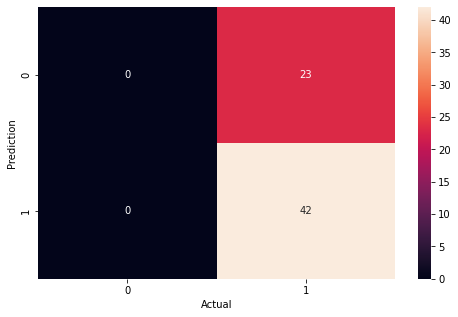

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

# Menghitung Akurasi

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        23
         1.0       0.65      1.00      0.79        42

    accuracy                           0.65        65
   macro avg       0.32      0.50      0.39        65
weighted avg       0.42      0.65      0.51        65



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
